<a href="https://colab.research.google.com/github/shaluduggal/shaluduggal/blob/machinelearning/data_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder  
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model as lm
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
df1=pd.DataFrame({'a':['high','low','medium'],'b':[10,20,30]},index=[0,1,2]) 
#categorical data using getdummies or label encoder
df2=pd.get_dummies(df1,prefix='a',columns=['a'])
#factorize or label encoder
df1['a_fact']=pd.factorize(df1['a'])[0]

#label encoding
le=LabelEncoder()
df1['a_label']=le.fit_transform(df1['a'])
df1.drop(labels=['a'],axis=1,inplace=True)
df1

,b,a_fact,a_label
0,10,0,0
1,20,1,1
2,30,2,2


In [ ]:
#normaization and scaling
scale1=preprocessing.MinMaxScaler().fit(df1)
df3=scale1.transform(df1)
df3

array([[0. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [1. , 1. , 1. ]])

In [ ]:
scale2=preprocessing.StandardScaler().fit(X=df1)
df3=scale2.transform(df1)
df3
print('z score =',np.mean(df3),np.std(df3))

NameError: name 'preprocessing' is not defined

In [ ]:
df=pd.read_csv("c:\dataset\iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
df.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

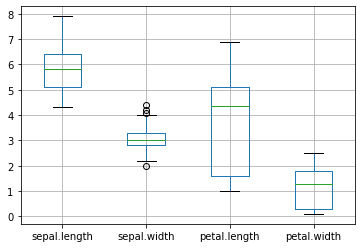

In [ ]:
df.boxplot()

<AxesSubplot:>

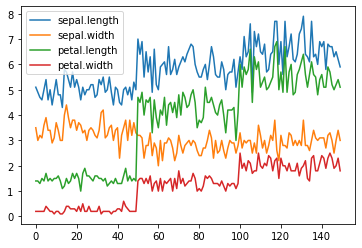

In [ ]:
df.plot()

array([[<AxesSubplot:title={'center':'sepal.length'}>,
        <AxesSubplot:title={'center':'sepal.width'}>],
       [<AxesSubplot:title={'center':'petal.length'}>,
        <AxesSubplot:title={'center':'petal.width'}>]], dtype=object)

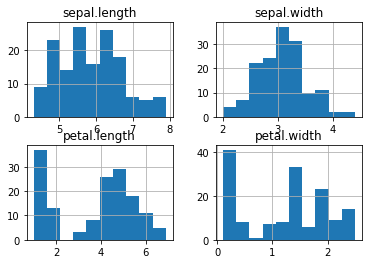

In [ ]:
df.hist()

In [ ]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['variety'].value_counts()

Virginica     50
Setosa        50
Versicolor    50
Name: variety, dtype: int64

<AxesSubplot:xlabel='variety'>

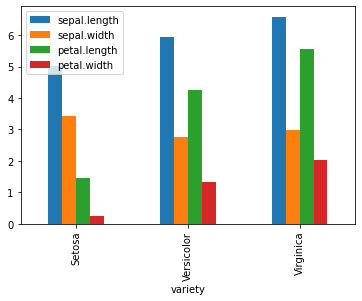

In [ ]:
df.groupby('variety').mean().plot(kind='bar')

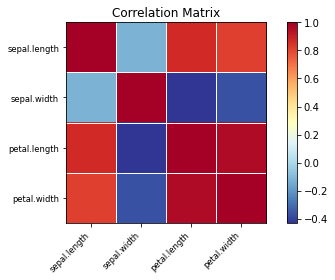

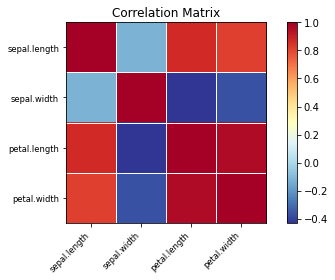

In [ ]:
corr=df.corr()
sm.graphics.plot_corr(corr,xnames=list(corr.columns))

coeff [[2.68456376]]
intercept [97.31543624]


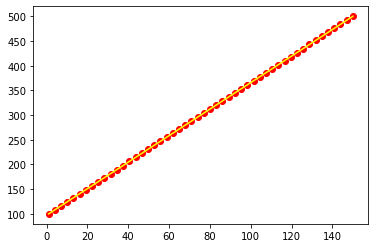

In [ ]:
x=np.array(np.linspace(1,150,50))
y=np.array(np.linspace(100,500,50))
lr=lm.LinearRegression()
x1=x
x=x.reshape(-1,1)
y=y.reshape(-1,1)
lr.fit(x,y)
print('coeff',lr.coef_)
print('intercept',lr.intercept_)
plt.scatter(x,y,color='red')
yh=lr.predict(x)
plt.plot(x,lr.predict(x),color='yellow')
plt.show()

In [ ]:
print(r2_score(y,yh))
print(mean_absolute_error(y,yh))
print(mean_squared_error(y,yh))

1.0
7.673861546209083e-15
4.079357513078896e-28


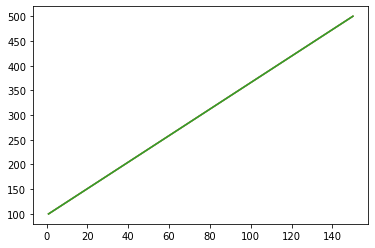

In [ ]:
#polynomial fit
for deg in [1,2,3]:
    lr.fit(np.vander(x1,deg+1),y)
    yp=lr.predict(np.vander(x1,deg+1))
    plt.plot(x,yp,label='degree')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
deg-4
lr=lm.LinearRegression()
model=make_pipeline(PolynomialFeatures(deg),lr)
model.fit(x,y)
print('coeff',lr.coef_)
print('intercept',lr.intercept_)
print(r2_score(y,yh))
print(mean_absolute_error(y,yh))
print(mean_squared_error(y,yh))

coeff [[ 0.00000000e+00  2.68456376e+00 -1.82105801e-13  7.66286614e-16]]
intercept [97.31543624]
1.0
7.673861546209083e-15
4.079357513078896e-28
